In [4]:
#Data Manipulation & Analysis
import pandas as pd   # Main library for data manipulation, cleaning, and analysis

# Visualization Libraries
import matplotlib.pyplot as plt    # Basic plotting (line, bar, scatter, histograms)
import plotly.express as px        # Quick & high-level interactive visualizations
import plotly.graph_objects as go  # More detailed, customizable interactive plots
from plotly.subplots import make_subplots  # Combine multiple plots into dashboards

import missingno as msno  # Visualize missing data patterns easily


# Statistical Analysis
from scipy.stats import f_oneway, chi2_contingency  
# f_oneway → ANOVA test (compare means across multiple groups)
# chi2_contingency → Chi-Square test (check categorical independence)


# Jupyter Notebook Display Settings
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"  
# Ensures multiple outputs are displayed from a single cell (not just the last one)


## 1. Initial Data Investigation 

**A. Dataset Loading & Structure**

In [5]:
df = pd.read_csv(r'Original_Online_Sales_Data.csv')

print(df.shape)     # 1155 rows , 9 columns 
print(df.columns)


(1155, 9)
Index(['Transaction ID', 'Date', 'Product Category', 'Product Name',
       'Units Sold', 'Unit Price', 'Total Revenue', 'Region',
       'Payment Method'],
      dtype='object')


**B. Data Types Analysis**

In [6]:
df.info() # they are not in the best format

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1155 entries, 0 to 1154
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Transaction ID    1155 non-null   int64  
 1   Date              1155 non-null   object 
 2   Product Category  1155 non-null   object 
 3   Product Name      232 non-null    object 
 4   Units Sold        982 non-null    object 
 5   Unit Price        1155 non-null   object 
 6   Total Revenue     1155 non-null   float64
 7   Region            1134 non-null   object 
 8   Payment Method    983 non-null    object 
dtypes: float64(1), int64(1), object(7)
memory usage: 81.3+ KB


**C. Initial Content Examination**

In [7]:
df.head(3)
df.tail(3)


,Transaction ID,Date,Product Category,Product Name,Units Sold,Unit Price,Total Revenue,Region,Payment Method
0,10001,2024-01-01 00:00:00,Electronics,iPhone 14 Pro,2,999.99,1999.98,North America,Credit Card
1,10002,2024-01-02 00:00:00,Home Appliances,NaN,1,499.99,499.99,Europe,PayPal
2,10003,2024-01-03 00:00:00,Clothing,NaN,3,69.99,209.97,Asia,Debit Card


,Transaction ID,Date,Product Category,Product Name,Units Sold,Unit Price,Total Revenue,Region,Payment Method
1152,10675,2024-05-22,Electronics,NaN,1,224.6,224.60,Europe,Credit Card
1153,10837,2024-09-04,Clothing,NaN,1,1.03,1.03,North America,Credit Card
1154,10236,2024-08-23 00:00:00,Home Appliances,Nespresso Vertuo Next Coffee and Espresso Maker,1,165.78,165.78,Europe,PayPal


**D. Basic Statistical Overview**

In [8]:
df.describe() 
df.describe(include='object')

,Transaction ID,Total Revenue
count,1155.000000,1.155000e+03
mean,10554.246753,1.531362e+04
std,318.133931,9.172878e+04
min,10001.000000,8.600000e-01
25%,10277.500000,5.831000e+01
50%,10555.000000,4.499900e+02
75%,10831.500000,1.209760e+03
max,11100.000000,2.019764e+06


,Date,Product Category,Product Name,Units Sold,Unit Price,Region,Payment Method
count,1155,1155,232,982,1155,1134,983
unique,641,6,171,74,777,3,7
top,2024-02-21,Electronics,Bose QuietComfort 35 Headphones,1,1.0,North America,Credit Card
freq,7,202,5,394,222,384,478


**E. Categorical Variable Exploration**

In [9]:
categorical_cols = ['Product Category', 'Region', 'Payment Method']

for col in categorical_cols :
    print(col)
    print(df[col].nunique())
    print(df[col].value_counts())
    print('\n')

Product Category
6
Product Category
Electronics        202
Sports             193
Books              192
Clothing           192
Beauty Products    190
Home Appliances    186
Name: count, dtype: int64


Region
3
Region
North America    384
Europe           379
Asia             371
Name: count, dtype: int64


Payment Method
7
Payment Method
Credit Card       478
PayPal            286
Debit Card        161
Cryptocurrency     20
Mobile Payment     15
Gift Card          15
Bank Transfer       8
Name: count, dtype: int64




**F. Data Volume Assessment**

In [10]:
df['Date'].min()
df['Date'].max()
df['Date'].value_counts().sum()

'2024-01-01'

'2025-04-23'

np.int64(1155)

## 📊 Initial Data Investigation – Data Volume Assessment  

### 1️⃣ Shape of the Data  
- **1155 rows** (transactions)  
- **9 columns** (features)  

### 2️⃣ Time Period Covered  
- From **2024-01-01** to **2025-04-23**   

### 3️⃣ Product Category  
- **6 unique categories**  
- Top categories:  
  - Electronics → 202 transactions  
  - Sports → 193 transactions  
  - Clothing → 192 transactions  

### 4️⃣ Region  
- **3 unique regions**  
- Top regions:  
  - North America → 384 transactions  
  - Europe → 379 transactions  
  - Asia → 371 transactions  

### 5️⃣ Payment Method  
- **7 unique payment methods**  
- Distribution:  
  - Credit Card → 478 transactions  
  - PayPal → 286 transactions  
  - Debit Card → 161 transactions  


## 2. Data Quality Assessment & Cleaning 

**A. Missing Value Analysis**

- make type conversions

In [11]:
for col in categorical_cols:
    df[col] = df[col].astype('category')  #  convert category columns be type category
 
df['Date'] = pd.to_datetime(df['Date'], format='mixed').dt.strftime("%Y-%m-%d")
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')  # convert date column to datetime type


numerical_col = ['Units Sold' , 'Unit Price']   
for col in numerical_col:
    df[col] = pd.to_numeric(df[col], errors='coerce')   # convert numerical columns to be numeric type

df.dtypes    



Transaction ID               int64
Date                datetime64[ns]
Product Category          category
Product Name                object
Units Sold                 float64
Unit Price                 float64
Total Revenue              float64
Region                    category
Payment Method            category
dtype: object

In [12]:
df.isna().sum() # get number of null values in each column
missing_df = pd.DataFrame({
    'column name' : df.columns ,
    'number of missing' : df.isna().sum().values ,
    'missing %' : ((df.isna().sum().values / len(df)) * 100)
})  # create new df with column_name , number_of_missing , missing_%

missing_df['missing %'] = missing_df['missing %'].round(2)


Transaction ID        0
Date                  0
Product Category      0
Product Name        923
Units Sold          179
Unit Price            7
Total Revenue         0
Region               21
Payment Method      172
dtype: int64

In [13]:
missing_df

,column name,number of missing,missing %
0,Transaction ID,0,0.00
1,Date,0,0.00
2,Product Category,0,0.00
3,Product Name,923,79.91
4,Units Sold,179,15.50
5,Unit Price,7,0.61
6,Total Revenue,0,0.00
7,Region,21,1.82
8,Payment Method,172,14.89


**B. Make some visualizations**

<Figure size 800x500 with 0 Axes>

<Axes: >

Text(0.5, 1.0, 'missing values per column')

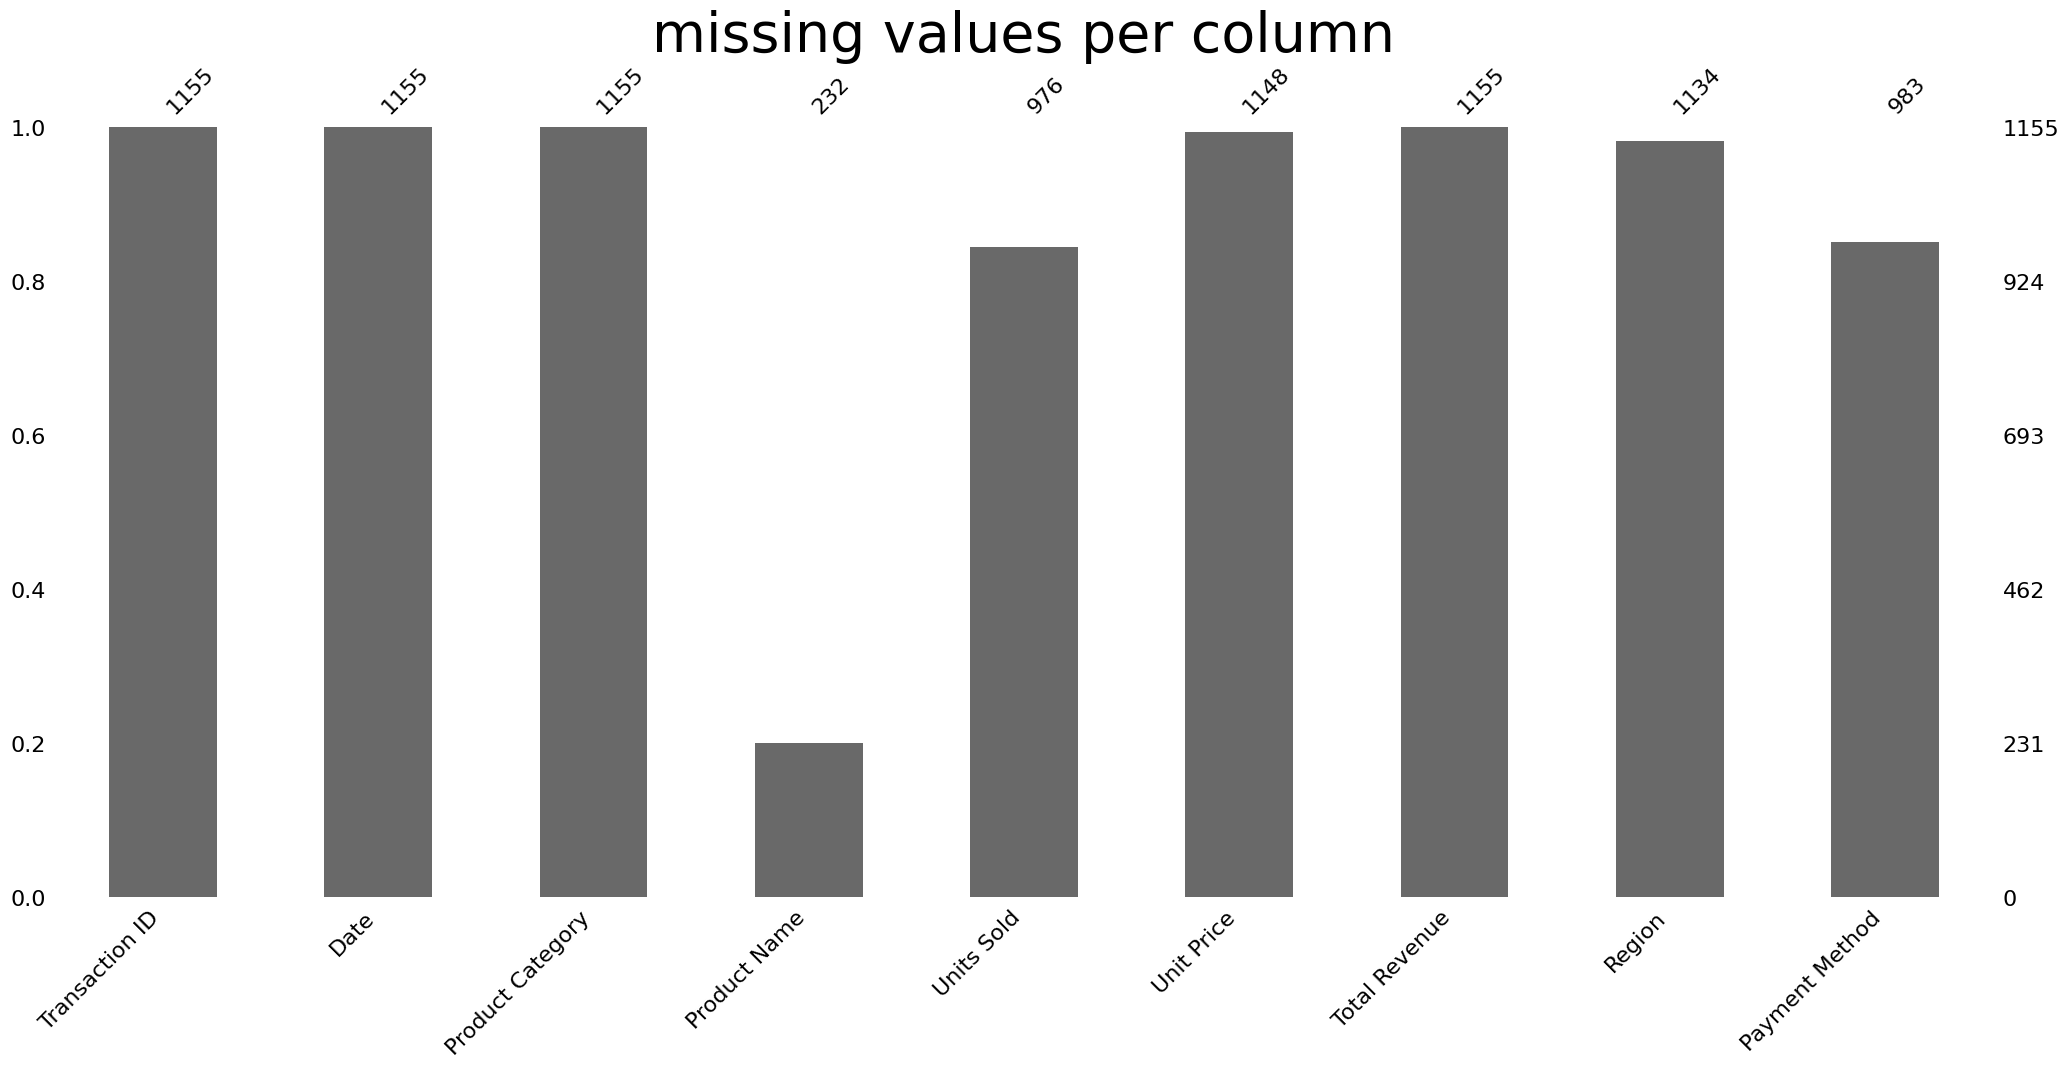

In [14]:
plt.Figure(figsize=(8,5))
msno.bar(df)
plt.title("missing values per column" , fontsize = 40)
plt.show()


<Figure size 800x500 with 0 Axes>

<Axes: >

Text(0.5, 1.0, 'Missing Data Matrix')

<Figure size 800x500 with 0 Axes>

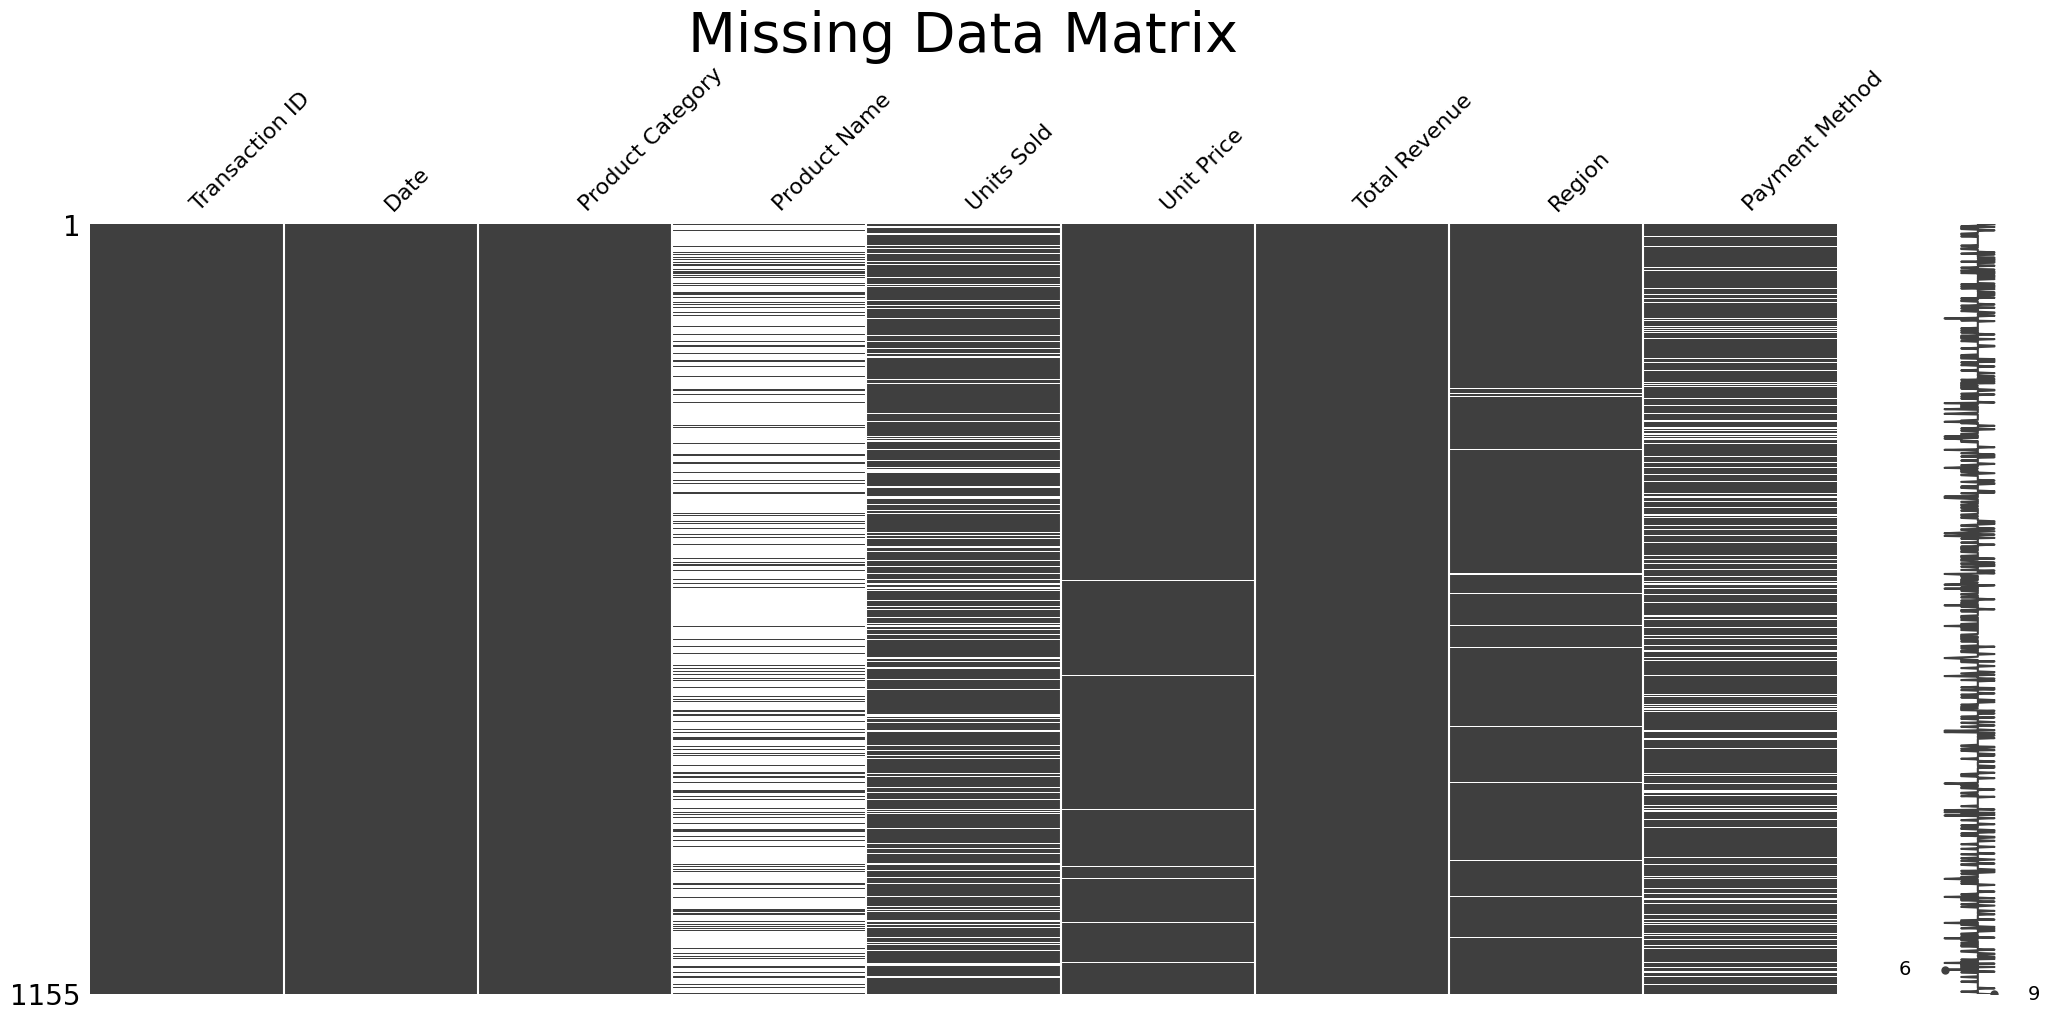

In [15]:
plt.figure(figsize=(8,5))
msno.matrix(df)
plt.title("Missing Data Matrix", fontsize=40)
plt.show()

<Figure size 800x500 with 0 Axes>

<Axes: >

Text(0.5, 1.0, 'Missing Data Matrix')

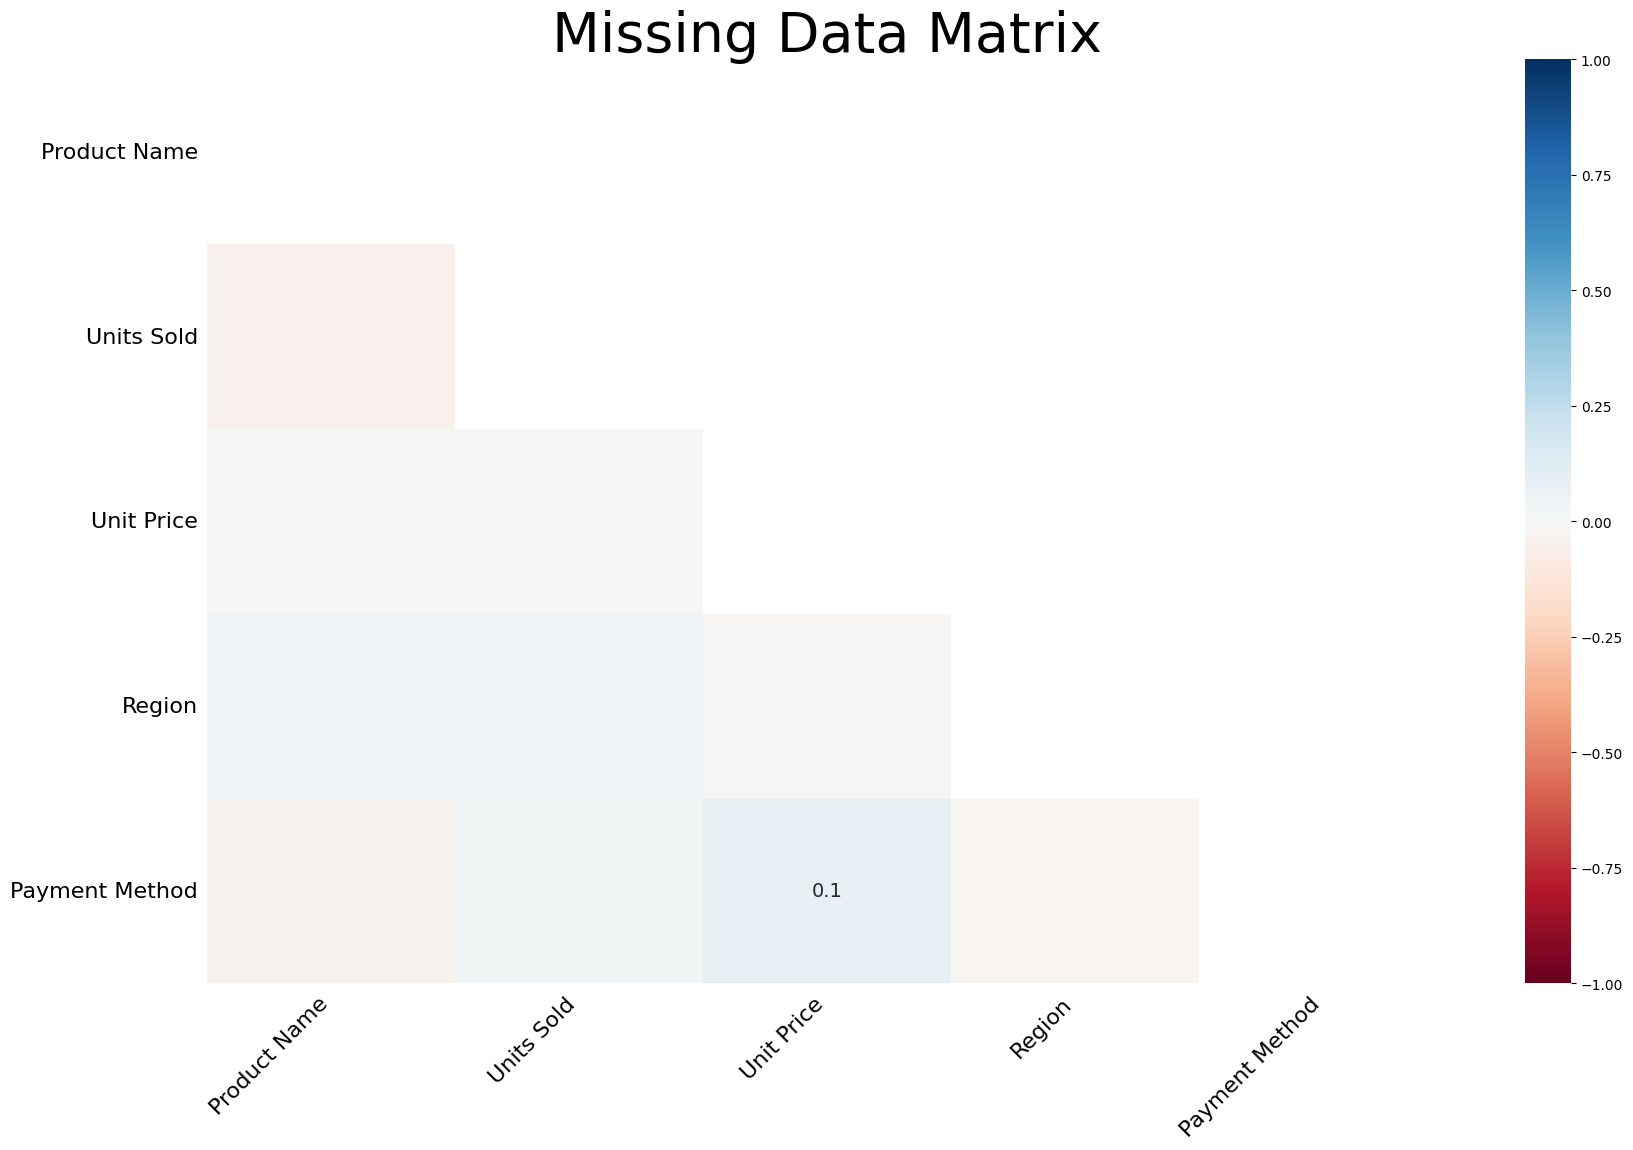

In [16]:
plt.Figure(figsize=(8,5))
msno.heatmap(df)
plt.title("Missing Data Matrix", fontsize=40)
plt.show()


**C. Determine the missing data mechanism**

- product_name   -> is fully missing by 79.91%  , we will drop this column becouse it have no data (MAR)
- unite sold     -> have missing data by 14.98% , we can fill them by  make it = (Total Revenue / Unit Price)
- Region         -> have missing data by 1.82%  , we can fill it be their (median)  (MCAR , small proportion) 
- payment method -> have missng data by 14.89%  , we can fill it by making the unkwonn (MNAR)

In [17]:
df = df.drop(columns=['Product Name']) # removeing product name from the original df


In [18]:
mask_units_missing = df['Units Sold'].isnull()

df.loc[mask_units_missing, 'Units Sold'] = (
    df.loc[mask_units_missing, 'Total Revenue'] / df.loc[mask_units_missing, 'Unit Price']
) # fill missing Units Sold by Total Revenue / Unit Price



mask_price_missing = df['Unit Price'].isnull()

df.loc[mask_price_missing, 'Unit Price'] = (
    df.loc[mask_price_missing, 'Total Revenue'] / df.loc[mask_price_missing, 'Units Sold']
)  # fill missing Unit Price by Total Revenue / Units Sold

# If any still missing, fill with median
df['Unit Price'] = df['Unit Price'].fillna(df['Unit Price'].median())

df['Units Sold'] = df['Units Sold'].fillna(df['Units Sold'].median())  # fill any other missing value with the median
df['Units Sold'].isna().sum()

df['Region'] = df['Region'].fillna(df['Region'].mode()[0])  # fill any other missing value with the mode
df['Region'].isna().sum()



np.int64(0)

np.int64(0)

In [19]:
# Add 'Unknown' to the categories before filling missing values
df['Payment Method'] = df['Payment Method'].cat.add_categories(['Unknown']) 
df['Payment Method'] = df['Payment Method'].fillna('Unknown')  # fill any other missing value with the string 'Unknown'
df['Payment Method'].isna().sum()

np.int64(0)

In [20]:
df.isna().sum() # the data has no null values for now

Transaction ID      0
Date                0
Product Category    0
Units Sold          0
Unit Price          0
Total Revenue       0
Region              0
Payment Method      0
dtype: int64

**D.Duplicate Detection**

In [21]:
df.duplicated().sum()
dup_counts = df['Transaction ID'].value_counts()  # get the value of duplicated transaction id
dup_ids = dup_counts[dup_counts > 1] # get number of duplicated in each transaction id
print("Duplicate Transaction IDs:\n", dup_ids)


np.int64(36)

Duplicate Transaction IDs:
 Transaction ID
10941    3
11098    2
10253    2
10390    2
10190    2
10519    2
10536    2
10482    2
10078    2
10491    2
10373    2
10230    2
10260    2
10492    2
10039    2
10216    2
10365    2
10106    2
10249    2
10414    2
10067    2
10236    2
10167    2
10367    2
10590    2
10641    2
10643    2
10674    2
10675    2
10703    2
10707    2
10730    2
10742    2
10777    2
10784    2
10822    2
10837    2
10868    2
10871    2
10882    2
10885    2
10892    2
10928    2
10287    2
10973    2
10987    2
10997    2
10998    2
11002    2
11010    2
11046    2
11048    2
11051    2
11055    2
Name: count, dtype: int64


In [22]:
df[df['Transaction ID'].isin(dup_ids.index)].sort_values('Transaction ID')


,Transaction ID,Date,Product Category,Units Sold,Unit Price,Total Revenue,Region,Payment Method
38,10039,2024-02-08,Clothing,4.0,59.99,239.96,Asia,Debit Card
1129,10039,2024-02-08,Clothing,4.0,59.99,239.96,Asia,Debit Card
1147,10067,2024-03-07,Electronics,1.0,1199.99,1253.28,North America,Credit Card
66,10067,2024-03-07,Electronics,1.0,1199.99,1199.99,North America,Credit Card
77,10078,2024-03-18,Sports,3.0,69.99,209.97,Asia,Credit Card
...,...,...,...,...,...,...,...,...
1128,11051,2024-04-29,Electronics,1.0,869.79,869.79,Europe,Unknown
1140,11055,2024-03-13,Home Appliances,4.0,212.31,849.24,Europe,Unknown
1054,11055,2024-03-13,Home Appliances,4.0,222.86,859.20,Europe,Unknown
1097,11098,2024-06-14,Electronics,4.0,1169.38,4677.52,Asia,PayPal


In [23]:
df = df.drop_duplicates(subset=['Transaction ID'], keep='first') # keep the first record from each duplicated transaction
df.duplicated().sum()



np.int64(0)

**E. Outlier Investigation**

In [24]:
df.drop(columns=['Date']).describe().round(3)   # to know the min and max of the numeric values

,Transaction ID,Units Sold,Unit Price,Total Revenue
count,1100.000,1100.000,1100.000,1100.000
mean,10550.500,23.329,454.984,15654.536
std,317.687,83.760,665.448,93478.393
min,10001.000,0.860,1.000,0.860
25%,10275.750,1.000,24.990,59.210
50%,10550.500,2.000,288.470,449.680
75%,10825.250,3.000,643.257,1209.580
max,11100.000,499.000,4741.230,2019763.980


In [25]:
numerical_col = ['Units Sold', 'Unit Price' , 'Total Revenue' ]

fig = px.box(df , y=numerical_col ,points='outliers' , title=f'Boxplot of {col} (with Outliers)')
fig.show()

In [26]:
outlier_summary = {}
for col in ['Units Sold', 'Unit Price', 'Total Revenue']:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
    outlier_summary[col] = outliers.shape[0]

print("\nOutlier counts per column:")
print(outlier_summary)





Outlier counts per column:
{'Units Sold': 80, 'Unit Price': 44, 'Total Revenue': 113}


**F. Outlier Handling**

- Units Sold    = Kept as valid because they represent wholesale transactions
- Unit Price    = Kept, since they reflect real business cases
- Total Revenue = Extreme values correspond to large and valid orders. 

**G. Data Consistency**

In [27]:
df['Total_Revenue_check'] = df['Unit Price'] * df['Units Sold']

inconsistencies = df[df['Total_Revenue_check'].round(4) != df['Total Revenue'].round(4)]
inconsistencies.shape # we have 25 rows with inconsistencies values

(25, 9)

In [28]:
df['Total Revenue'] = (df['Unit Price'] * df['Units Sold']).round(2)  # change the value to be correct 


df.drop(columns=['Total_Revenue_check'], inplace=True) # Drop the helper column , don't need it any more

# Verify again
print("Remaining inconsistencies:",
      df[(df['Unit Price'] * df['Units Sold']).round(2) != df['Total Revenue']].shape[0])


Remaining inconsistencies: 0


In [29]:
df.shape

(1100, 8)

# 🧹 Requirement 2: Data Quality Assessment & Cleaning  

### 1️⃣ Missing Data Handling  
- **Detected Missing Values:**  
  - `Product Name` → 923 missing (~80%) → Dropped (not critical for analysis).  
  - `Units Sold` → 179 missing → Recalculated from `Total Revenue ÷ Unit Price`, then filled remaining with median.  
  - `Unit Price` → 7 missing → Recalculated from `Total Revenue ÷ Units Sold` where possible.  
  - `Region` → 21 missing → Filled with most common value (mode).  
  - `Payment Method` → 172 missing → Filled with most common value (mode).  
- ✅ All missing values resolved.  

---

### 2️⃣ Duplicate Detection  
- Found **duplicate Transaction IDs** (36 row, `10941` with different `Units Sold`).  
- Decision: **Kept only the first occurrence** per ID to ensure unique transactions.  
- ✅ Dataset now has unique Transaction IDs.  

---

### 3️⃣ Outlier Investigation & Handling  
- **Units Sold** → Bulk purchases detected (valid).  
- **Unit Price** → Premium products with very high prices detected (valid).  
- **Total Revenue** → Large transactions from premium products/bulk orders detected (valid).  
- Decision: **Kept all outliers** since they represent real-world business cases.  
- ✅ Outliers retained for business insights.  

---

### 4️⃣ Data Consistency  
- Verified that `Total Revenue = Unit Price × Units Sold`.  
- Found **25 inconsistent rows**.  
- Fixed by recalculating `Total Revenue` using formula.  
- ✅ All revenues consistent.  

---

## ✅ Final Dataset Status
- **Rows:** 1100  
- **Columns:** 9  
- **No missing values**  
- **No duplicate Transaction IDs**  
- **Consistent Total Revenue values**  
- **Standardized date format**  
- Dataset is **clean and reliable** for further analysis.  


# 3. Exploratory Data Analysis 

### A. Temporal Analysis (using Date column)

**A. Daily/Weekly/Monthly sales patterns**

In [30]:
# --- Daily Revenue ---
daily = df.groupby('Date')['Total Revenue'].sum().reset_index()

# --- Weekly Revenue ---
weekly = df.groupby(df['Date'].dt.to_period('W'))['Total Revenue'].sum().reset_index()
weekly['Date'] = weekly['Date'].dt.start_time

# --- Monthly Revenue ---
monthly = df.groupby(df['Date'].dt.to_period('M'))['Total Revenue'].sum().reset_index()
monthly['Date'] = monthly['Date'].dt.start_time

# --- Create Subplots ---
fig = make_subplots(
    rows=3, cols=1,
    subplot_titles=("Daily Revenue", "Weekly Revenue", "Monthly Revenue")
)

# Add Daily
fig = fig.add_trace(
    go.Scatter(x=daily['Date'], y=daily['Total Revenue'], mode='lines', name="Daily"),
    row=1, col=1
)

# Add Weekly
fig = fig.add_trace(
    go.Scatter(x=weekly['Date'], y=weekly['Total Revenue'], mode='lines+markers', name="Weekly"),
    row=2, col=1
)

# Add Monthly
fig = fig.add_trace(
    go.Scatter(x=monthly['Date'], y=monthly['Total Revenue'], mode='lines+markers', name="Monthly"),
    row=3, col=1
)

# Layout
fig = fig.update_layout(
    height=900, width=1000,
    title_text="Revenue Trends: Daily, Weekly, and Monthly",
    showlegend=False
)

fig.show()


**B. Seasonal variations and peak periods**

In [31]:
# --- Monthly Revenue ---
month_rev = df.groupby(df['Date'].dt.month_name())["Total Revenue"].sum()
month_order = ["January","February","March","April","May","June","July","August","September","October","November","December"] # ordrer of months
month_rev = month_rev.reindex(month_order).dropna()

# --- Weekday Revenue ---
week_day = df.groupby(df['Date'].dt.day_name())['Total Revenue'].sum()
days_order = ["Monday","Tuesday","Wednesday","Thursday","Friday","Saturday","Sunday"] # order of days
week_day = week_day.reindex(days_order)

# --- Create Subplots ---
fig = make_subplots(
    rows=1, cols=2,
    subplot_titles=("Revenue by Month", "Revenue by Day")
)

# Add Monthly Revenue
fig = fig.add_trace(
    go.Bar(x=month_rev.index, y=month_rev.values, name="Monthly Revenue"),
    row=1, col=1
)

# Add Weekday Revenue
fig = fig.add_trace(
    go.Bar(x=week_day.index, y=week_day.values, name="Weekday Revenue"),
    row=1, col=2
)

# Layout
fig = fig.update_layout(
    height=500, width=1200,
    title_text="Revenue Trends by Month and Day",
    showlegend=False
)

fig.show()


**C.Sales trend identification**

In [32]:
daily['Rolling_14d'] = daily['Total Revenue'].rolling(14).mean()     # calculate the 14-day rolling average of the total revenue
px.line(daily, x='Date', y='Rolling_14d', title="14-Day Rolling Avg Revenue").show()

### B.Product Category Performance (using Category, Unit_Price, Quantity, Total_Price)

**A. Revenue distribution across categories**

In [33]:
category_revenue = df.groupby(df['Product Category'] , observed=True)['Total Revenue'].sum().reset_index()
px.pie(category_revenue , values='Total Revenue' , names='Product Category' ,title='Revenue Distribution by Product Category')

**B. Average order values by category**

In [34]:
avg_category_revenue = df.groupby(df['Product Category'] , observed=True)['Total Revenue'].mean().reset_index()
px.bar(avg_category_revenue ,x="Product Category", y="Total Revenue", title='avg_category_revenue')

**C.Quantity patterns by category**

In [35]:
px.box(df , x=df['Product Category'] ,y=df['Units Sold'] , title='Quantity Distribution by Product Category')

**D.Category popularity rankings**

In [36]:
category_stats = df.groupby("Product Category", observed=True).agg(
    Transactions=("Transaction ID", "count"),
    Total_Revenue=("Total Revenue", "sum"),
    Avg_Order_Value=("Total Revenue", "mean")
).reset_index()

# Create subplot layout
fig = make_subplots(
    rows=1, cols=3,
    subplot_titles=("Transactions per Category", "Total Revenue per Category", "Avg Order Value per Category")
)

# Add Transactions
fig = fig.add_trace(
    go.Bar(x=category_stats['Product Category'], y=category_stats['Transactions'], name="Transactions"),
    row=1, col=1
)

# Add Total Revenue
fig = fig.add_trace(
    go.Bar(x=category_stats['Product Category'], y=category_stats['Total_Revenue'], name="Total Revenue"),
    row=1, col=2
)

# Add Avg Order Value
fig = fig.add_trace(
    go.Bar(x=category_stats['Product Category'], y=category_stats['Avg_Order_Value'], name="Avg Order Value"),
    row=1, col=3
)

# Update layout
fig = fig.update_layout(
    height=500, width=1200,
    title_text="Category Performance Metrics",
    bargap=0.5
)

fig.show()


## C. Geographic Analysis (using Region, Total_Price, Category)

**A.Regional sales performance comparison**

In [37]:
Geographical_stats = df.groupby("Region", observed=True).agg(
    Transactions=("Transaction ID", "count"),
    Total_Revenue=("Total Revenue", "sum"),
    Avg_Order_Value=("Total Revenue", "mean")
).reset_index()


# Create subplot layout
fig = make_subplots(
    rows=1, cols=3,
    subplot_titles=("Transactions by Region", "Total Revenue by Region", "Avg Order Value by Region")
)

# Add Transactions
fig = fig.add_trace(
    go.Bar(x=Geographical_stats['Region'], y=Geographical_stats['Transactions'], name="Transactions"),
    row=1, col=1
)

# Add Total Revenue
fig = fig.add_trace(
    go.Bar(x=Geographical_stats['Region'], y=Geographical_stats['Total_Revenue'], name="Total Revenue"),
    row=1, col=2
)

# Add Avg Order Value
fig = fig.add_trace(
    go.Bar(x=Geographical_stats['Region'], y=Geographical_stats['Avg_Order_Value'], name="Avg Order Value"),
    row=1, col=3
)

# Update layout
fig = fig.update_layout(
    height=500, width=1200,
    title_text="Geographical Performance Metrics",
    bargap=0.5
)

fig.show()


**B. Revenue distribution across regions**

In [38]:
Geographical_stats = df.groupby('Region' , observed=True)['Total Revenue'].sum().reset_index()
px.pie(Geographical_stats ,names='Region',values='Total Revenue' , title="Revenue Distribution Across Regions")


**C.Regional category preferences**

In [39]:
region_category = df.groupby(["Region", "Product Category"] , observed=True)['Total Revenue'].sum().reset_index()
px.bar(region_category, x="Region", y="Total Revenue", color="Product Category" ,barmode="group", title="Regional Category Preferences (by Revenue)")


## D.  Payment Method Analysis (using Payment_Method, Total_Price, Region)

**A. Payment method adoption rates**

In [40]:
payment_share = df.groupby('Payment Method' , observed=True)['Transaction ID'].count().reset_index()
px.pie(payment_share ,names='Payment Method' , values='Transaction ID' , title=r'% of payment methods per transaction') 

**B. Average transaction values by payment type**

In [41]:
payment_avg  = df.groupby('Payment Method' , observed=True)['Total Revenue'].mean().reset_index()
px.bar(payment_avg  , x='Payment Method' , y='Total Revenue',title='Average Transaction Value by Payment Method')

**C. Regional payment preferences**

In [42]:
region_payment = df.groupby(['Region' , 'Payment Method'],observed=True)["Transaction ID"].count().reset_index()
px.bar(region_payment , x='Region' , y='Transaction ID' , color='Payment Method' , barmode='group',title='Regional Payment Preferences')

## E. Price and Quantity Insights (using Unit_Price, Quantity, Total_Price,Category)

**A. Price distribution analysis across categories**

In [43]:
px.box(df , x='Product Category', y='Unit Price' , title='Unit Price Distribution by Category')
px.histogram(df , x='Unit Price' , color='Product Category', title='Unit Price Histogram by Category' , barmode='overlay' , nbins=50)

**B. Quantity purchase patterns**

In [44]:
px.histogram(df, x='Units Sold' , nbins=30)

## F.Cross-Variable Relationships

**A. Price vs. Quantity correlation**

In [45]:
Price_vs_Quantity = px.scatter(df, x="Unit Price", y="Units Sold",
                  size="Total Revenue", color="Product Category",
                  title="Unit Price vs Quantity Sold")
Price_vs_Quantity

**B. Regional spending patterns**

In [46]:
regional_spending = df.groupby('Region', observed=True)['Total Revenue'].mean().reset_index()
region_spending_fig = px.bar(regional_spending, x='Region', y='Total Revenue', title='regional spending patterns')
region_spending_fig.update_layout(bargap=0.4)

**C. Category-Payment method relationships**

In [47]:
category_payment = df.groupby(["Product Category", "Payment Method"], observed=True)["Transaction ID"].count().reset_index()

category_payment_fig = px.bar(category_payment, x="Product Category", y="Transaction ID",
              color="Payment Method", barmode="group",
              title="Category vs Payment Method Preferences")
category_payment_fig.update_layout(bargap=0.3)

# 📊 Exploratory Data Analysis (EDA) – Findings & Interpretations

### 🕒 Temporal Analysis
 - **Peak Periods**: March and October showed the highest Total Revenue  
- **Trend**: Overall sales are slightly decreasing across the dataset period

---

### 🛒 Product Category Performance
- **Revenue Distribution**: Electronics is the top revenue generator, contributing the largest share of marketplace income.  
- **Average Order Value**: Electronics and Home Appliances have the **highest mean transaction values**, while Sports and Clothing tend to have smaller orders.  
- **Quantity Patterns**: Customers usually buy **Electronics in single units**, but categories like **Clothing and Books** are often bought in multiples.  
- **Category Popularity**: In terms of transaction count, Clothing and Books are very common, but their **revenue impact is lower** compared to Electronics.

---

### 🌍 Regional Sales Performance
- **Revenue Share**: North America contributes the highest total revenue, followed by Europe and Asia.  
- **Average Transaction Value**: North America shows slightly higher **per-transaction spending**
- **Regional Preferences**:  
  - Asia → Strong preference for Electronics.  
  - Europe → Strong preference for Home Appliances.  
  - North America → Higher sales in Books.

---

### 💳 Payment Method Analysis
- **Adoption Rates**: Credit Card is the most widely used payment method, followed by PayPal. Debit Card and other methods are less common.  
- **Spending Patterns**: PayPal and Credit Card transactions generally have higher average values compared to other methods.  
- **Regional Preferences**:  
  - North America → Heavily Credit Card driven.  
  - Europe → More balanced between PayPal and Credit Card.  
  - Asia → Heavily Credit Card driven.

---

### 💲 Price & Quantity Insights
- **Price Distribution**: Electronics and Home Appliances show a wide range of prices, while Clothing and Books remain mostly low-priced.  
- **Quantity Patterns**: Most transactions involve **1–2 units**, confirming that purchases are often **individual or small orders**.  

---

### 🔗 Cross-Variable Relationships
- **Price vs Quantity**: Higher-priced products (Electronics, Appliances) are generally bought in **smaller quantities**.  
- **Regional Spending**: Europe has the **highest average per-transaction spending**, though North America leads in overall revenue.  
- **Category & Payment**: Electronics and Sports are often paid via **Credit Card**, while Beauty Products and Home Appliances see more **PayPal/alternative payments**.

---

✅ **Key Marketplace Insights**:
1. Electronics is the **dominant revenue driver**, but Books and Clothing bring **high transaction volume**.  
2. North America is the **largest market and highest-spending region**
3. Credit Cards dominate, but offering **alternative payment methods** (PayPal, Wallets) is important regionally.  
4. Most customers buy **small quantities**, but a few **bulk or high-value transactions** account for the majority of revenue.  


#

# 4. Feature Engineering & Data Transformation

## A.Temporal Features

**A. Extract day of week, month, quarter from Date column**

In [48]:
df['Day_of_week'] = df['Date'].dt.day_name()
df['Month'] = df['Date'].dt.month_name()
df['Quarter'] = df['Date'].dt.to_period('Q')  # identify by seasons 

df[['Day_of_week' , 'Month' ,'Quarter']].head(3)
df[['Day_of_week' , 'Month' ,'Quarter']].tail(3)


,Day_of_week,Month,Quarter
0,Monday,January,2024Q1
1,Tuesday,January,2024Q1
2,Wednesday,January,2024Q1


,Day_of_week,Month,Quarter
1097,Friday,June,2024Q2
1098,Saturday,February,2024Q1
1099,Tuesday,July,2024Q3


**B.Create seasonal indicators (Spring, Summer, Fall, Winter)**

In [49]:
# Map months to seasons
def assign_season(month):
    if month in [3, 4, 5]:
        return "Spring"
    elif month in [6, 7, 8]:
        return "Summer"
    elif month in [9, 10, 11]:
        return "Fall"
    else:  # 12, 1, 2
        return "Winter"

df['Season'] = df['Date'].dt.month.map(assign_season)   # to add a new column to the df with the season of each month

# Quick check
df[['Date', 'Month', 'Season']].head(2)
df[['Date', 'Month', 'Season']].tail(2)


,Date,Month,Season
0,2024-01-01,January,Winter
1,2024-01-02,January,Winter


,Date,Month,Season
1098,2024-02-03,February,Winter
1099,2024-07-30,July,Summer


**C. Identify weekdays vs. weekends**

In [50]:
# Create binary indicator (Weekend or Weekday)
df['weekend_indicator'] = df['Day_of_week'].isin(['Saturday', 'Sunday']).astype(int)
df['weekend_indicator'].value_counts()



weekend_indicator
0    795
1    305
Name: count, dtype: int64

**D. Calculate days since first transaction (customer lifecycle indicators)**

In [51]:
First_date = df['Date'].min()
df['Days_Since_First'] = (df['Date'] - First_date).dt.days

df[['Date' , 'Days_Since_First']].head()

,Date,Days_Since_First
0,2024-01-01,0
1,2024-01-02,1
2,2024-01-03,2
3,2024-01-04,3
4,2024-01-05,4


## B.Business Metrics


**A. Price per unit categories (Low, Medium, High based on quartiles)**

In [52]:
# Define quartiles
q1 = df['Unit Price'].quantile(0.25)
q3 = df['Unit Price'].quantile(0.75)

# Create categories
def price_category(unit_price : float):
    """to separate the unit price values into 3 main category (Low , Medium , High)"""
    if unit_price <= q1:
        return 'Low'
    elif unit_price <= q3:
        return 'Medium'
    else:
        return 'High'

df['Price_Category'] = df['Unit Price'].apply(price_category)

# Quick check
df['Price_Category'].value_counts()


Price_Category
Medium    548
Low       277
High      275
Name: count, dtype: int64

**B. Order size categories (Single item, Small bulk, Large bulk)**

In [53]:
def order_size(units_sold : int ):
    """"to separate number of the units sold values into 3 main category (Single item , Small bulk , Large bulk)"""

    if units_sold == 1:
        return 'Single item'
    elif 2 <= units_sold <= 5:
        return 'Small bulk'
    else:
        return'Large bulk'
    
df['Order_size'] =df['Units Sold'].apply(order_size)   

df['Order_size'].value_counts()
    

Order_size
Small bulk     578
Single item    432
Large bulk      90
Name: count, dtype: int64

**C. Revenue tiers for transactions**

In [54]:
# Define quantiles
t1 = df['Total Revenue'].quantile(0.33)
t2 = df['Total Revenue'].quantile(0.66)

# Create categories
def revenue_tier(total_revenue: float):
    """to separate total revenue values into 3 main tiers (Budget , Standard , Premium)"""
    if total_revenue <= t1:
        return 'Budget'
    elif total_revenue <= t2:
        return 'Standard'
    else:
        return 'Premium'

df['Revenue_Tier'] = df['Total Revenue'].apply(revenue_tier)

# Quick check
df['Revenue_Tier'].value_counts()

    

Revenue_Tier
Premium     374
Standard    363
Budget      363
Name: count, dtype: int64

## C.Geographic Features

**A. Revenue concentration by region**

In [55]:
region_revenue = df.groupby('Region' , observed=True)['Total Revenue'].sum().reset_index()

total_revenue = df['Total Revenue'].sum()

region_revenue['Revenue %'] = (region_revenue['Total Revenue'] / total_revenue * 100).round(2)  # get total revenue for each region by (%)
region_revenue = region_revenue.sort_values(by='Total Revenue' , ascending=False)               # sort them from bigger to smaller

region_revenue


,Region,Total Revenue,Revenue %
2,North America,6855734.68,39.76
1,Europe,5814074.78,33.72
0,Asia,4572843.51,26.52


**B. Regional market penetration metrics**

In [56]:
# Group metrics by region
region_metrics = df.groupby('Region' , observed=True).agg(
    Transactions=('Transaction ID', 'count'),
    Total_Revenue=('Total Revenue', 'sum'),
    Avg_Revenue_per_Transaction=('Total Revenue', 'mean')
).reset_index()

region_metrics['Avg_Revenue_per_Transaction'] = region_metrics['Avg_Revenue_per_Transaction'].round(2)

# Sort by Total Revenue (descending)
region_metrics = region_metrics.sort_values(by='Total_Revenue', ascending=False)

region_metrics


,Region,Transactions,Total_Revenue,Avg_Revenue_per_Transaction
2,North America,388,6855734.68,17669.42
1,Europe,358,5814074.78,16240.43
0,Asia,354,4572843.51,12917.64


## D. Advanced Features

**A. Average selling price by product category**

In [57]:
avg_selling_price_per_product = df.groupby('Product Category' , observed=True)['Unit Price'].mean().reset_index()
avg_selling_price_per_product.sort_values(by='Unit Price' , ascending=False)


,Product Category,Unit Price
3,Electronics,612.070471
5,Sports,508.787377
4,Home Appliances,436.970455
0,Beauty Products,400.376868
2,Clothing,387.846541
1,Books,376.732022


**B. Category performance relative to overall marketplace**

In [58]:
# Overall marketplace averages
overall_revenue = df['Total Revenue'].mean()
overall_transactions = df.groupby('Product Category' , observed=True)['Transaction ID'].count().mean()

# Category-level performance
category_perf = df.groupby('Product Category', observed=True).agg(
    total_revenue=('Total Revenue', 'sum'),
    avg_revenue=('Total Revenue', 'mean'),
    transaction_count=('Transaction ID', 'count')
).reset_index()

# Compare with overall averages
category_perf['Revenue_vs_Avg'] = category_perf['avg_revenue'] - overall_revenue
category_perf['TransCount_vs_Avg'] = category_perf['transaction_count'] - overall_transactions

# Sorting for easier readability
category_perf.sort_values(by='total_revenue', ascending=False, inplace=True)
category_perf



,Product Category,total_revenue,avg_revenue,transaction_count,Revenue_vs_Avg,TransCount_vs_Avg
3,Electronics,4729373.19,24761.116178,191,9085.977114,7.666667
4,Home Appliances,3357410.14,19076.193977,176,3401.054914,-7.333333
1,Books,3262354.58,17827.074208,183,2151.935144,-0.333333
0,Beauty Products,2424241.23,13320.006758,182,-2355.132305,-1.333333
5,Sports,2260484.81,12352.376011,183,-3322.763053,-0.333333
2,Clothing,1208789.02,6533.994703,185,-9141.144361,1.666667


**C. Transaction complexity scores**

In [59]:
df[["Transaction ID", "Total Revenue", "Order_size", "Price_Category", "Revenue_Tier"]].head()


,Transaction ID,Total Revenue,Order_size,Price_Category,Revenue_Tier
0,10001,1999.98,Small bulk,High,Premium
1,10002,499.99,Single item,Medium,Standard
2,10003,209.97,Small bulk,Medium,Standard
3,10004,63.96,Small bulk,Low,Budget
4,10005,89.99,Single item,Medium,Budget


**D. Some visualizations about the new features**

In [60]:
order_size_fig = px.bar(
    df['Order_size'].value_counts().reset_index(),
    x='Order_size', y='count',
    title="Order Size Distribution",
    labels={'Order_size': 'Order Size', 'count': 'Number of Transactions'}
)
order_size_fig

# the most order size is small by 578 orders then single item then large bulk

In [61]:
price_category_fig = px.bar(df['Price_Category'].value_counts().reset_index(),
            x='Price_Category', y='count',
            title='Price Category Distribution',
            labels={'count': 'Number of Transactions', 'Price_Category': 'Price Category'}
            )
price_category_fig

# the most price category appears is (medium by 548 , low by 277 , high by 275)


In [62]:
revenue_tier_fig = px.pie(df ,names='Revenue_Tier', title='Revenue Tier Share')
revenue_tier_fig

# the most revenue tier appears is (Premium by 34% , Standard and Bugdet with 33%)

In [63]:
order_size_by_revenue = px.histogram(df,
                                    x='Order_size',
                                    color='Revenue_Tier'
                                    , title='Order Size vs Revenue Tier', barmode='group')
order_size_by_revenue

# in single item the Tier Revenue is standard
# in small bulk(2 to 5) the Tier Revenue is Premium
# in large bulk(order > 5) the Tier Revenue is Premium

In [64]:
px.histogram(df, x='Order_size' , color='Product Category' , barmode='group')

# in small bulk the most is clothing by 109 and books by 106 order
# in single item the most is Beauty products by 95 order
# in lage bulk the most is electronics by 21 order

In [65]:
price_category_for_regions_fig = px.histogram(df,
                                              x='Price_Category',
                                              color="Region",
                                              barmode="group",
                                              title='price_category for each Region')
price_category_for_regions_fig

# for high category North America is on the top by 105 transactions
# for low category North America is on the top by 111 transactions
# for Medium category Asia is on the top by 195 transactions


# 📊 Visualizations of New Features  

### 📦 Order Size Distribution  
- **Most common order size**: **Small bulk (2–5 items)** with **578 transactions**.  
- Followed by **Single item purchases**, then **Large bulk orders (6+ items)**.  

---

### 💲 Price Category Distribution  
- **Medium-priced items** dominate with **548 transactions**.  
- **Low-priced items**: 277 transactions.  
- **High-priced items**: 275 transactions.  

---

### 💵 Revenue Tier Share  
- **Premium transactions**: ~34% of total revenue.  
- **Standard transactions**: ~33%.  
- **Budget transactions**: ~33%.  
- → The marketplace has a **balanced distribution**, but **Premium leads slightly**.  

---

### 📦 Order Size vs. Revenue Tier  
- **Single item purchases** → Mostly belong to the **Standard revenue tier**.  
- **Small bulk orders (2–5)** → Contribute the most to **Premium revenue**.  
- **Large bulk orders (6+)** → Also skew towards **Premium revenue**.  

---

### 📦 Order Size vs. Product Category  
- **Small bulk orders**: Clothing (**109 orders**) and Books (**106 orders**) dominate.  
- **Single item purchases**: Beauty Products are the most frequent (**95 orders**).  
- **Large bulk purchases**: Electronics dominate (**21 orders**).  

---

### 🌍 Price Category by Region  
- **High-priced items**: **North America** leads (**105 transactions**).  
- **Low-priced items**: **North America** again dominates (**111 transactions**).  
- **Medium-priced items**: **Asia** leads strongly (**195 transactions**).  

---

✅ **Key Insights**:  
1. Customers most often purchase **small bulk orders**, especially in **Clothing & Books**.  
2. **Premium revenue** is concentrated in **small and large bulk orders**.  
3. **North America** dominates both **low** and **high-priced markets**, while **Asia** is strong in **medium-priced items**.  
4. **Electronics bulk purchases** strongly drive **Premium revenue**.  


## E. Statistical Analysis & Hypothesis Testing

### A. Regional Performance Comparison:

**A. Test if mean transaction values differ significantly across regions**

In [66]:
f_stat, p_val = f_oneway(
    df[df['Region'] == 'North America']['Total Revenue'],
    df[df['Region'] == 'Europe']['Total Revenue'],
    df[df['Region'] == 'Asia']['Total Revenue']
)    # Perform ANOVA test to check if mean transaction values differ across regions

print("ANOVA p-value:", p_val)  #ANOVA = Analysis of Variance , checks if the (mean) is the same across multiple groups or there is a big differences

if p_val < 0.05:
    print("Mean transaction values differ across regions")
else:
    print("No significant difference between regions")

ANOVA p-value: 0.7802037261723879
No significant difference between regions


**B. Investigate if product category preferences vary by region**

In [67]:
# Create a table of Region vs Product Category counts
table = pd.crosstab(df['Region'], df['Product Category'])

# Chi-Square test
chi2, p_val, _, _ = chi2_contingency(table) # chi2_contingency => check if two categorical variables are independent or dependent 
                                            # chi2 => measures difference between observed vs expected counts
                                            # (_,_) => Expected frequencies and degrees of freedom we just ignore them

print("Chi-Square p-value:", p_val)
if p_val < 0.05:
    print("Product category preferences vary by region")
else:
    print("No significant difference in preferences between regions")



Chi-Square p-value: 2.4568907672803e-15
Product category preferences vary by region


### B. Payment Method Analysis

**A. Test if average order values differ by payment method**

In [68]:
# Group data by payment method
groups = [df[df['Payment Method'] == pm]['Total Revenue'] for pm in df['Payment Method'].unique()] # create a list of series for each payment method with the total revenue values

# ANOVA test
f_stat, p_val = f_oneway(*groups) # unpack the list of series into separate arguments for f_oneway

print("ANOVA F-statistic:", f_stat)
print("p-value:", p_val)

if p_val < 0.05:
    print("Average order values differ significantly by payment method.")
else:
    print("No significant difference in average order values across payment methods.")


ANOVA F-statistic: 1.3812663273745285
p-value: 0.20939423406746213
No significant difference in average order values across payment methods.


**B. Analyze if payment method adoption is uniform across regions**

In [69]:
# Cross-tab of Payment Method vs Region
table = pd.crosstab(df['Region'], df['Payment Method'])

# Chi-square test
chi2, p_val, _, _ = chi2_contingency(table)

print("Chi-square:", chi2)
print("p-value:", p_val)

if p_val < 0.05:
    print("Payment method adoption depends on region (not uniform).")
else:
    print("Payment method adoption is uniform across regions.")

Chi-square: 112.35335522430319
p-value: 1.9536473670698552e-17
Payment method adoption depends on region (not uniform).


### C.Product Category Insights

**A. Test for significant differences in average prices across categories**

In [70]:
# Group prices by product category
groups = [df[df['Product Category'] == cat]['Unit Price'] for cat in df['Product Category'].unique()]

# ANOVA test
f_stat, p_val = f_oneway(*groups)

print("ANOVA F-statistic:", f_stat)
print("p-value:", p_val)

if p_val < 0.05:
    print("Average prices differ significantly across product categories.")
else:
    print("No significant difference in average prices across categories.")


ANOVA F-statistic: 3.562650335418811
p-value: 0.003355447882601042
Average prices differ significantly across product categories.


**B. Investigate seasonal effects on category performance**

In [71]:
# Cross-tab: Product Category vs Season
table = pd.crosstab(df['Product Category'], df['Season'])

# Chi-square test
chi2, p_val, _, _ = chi2_contingency(table)

print("Chi-square:", chi2)
print("p-value:", p_val)

if p_val < 0.05:
    print("Product category performance depends on season (seasonal effect detected).")
else:
    print("No significant seasonal effect on product category performance.")


Chi-square: 14.082330064003749
p-value: 0.5192944093049932
No significant seasonal effect on product category performance.


## F. Advanced Analytics & Business Insights

### A. Customer Segmentation (Transaction-Based)

**A. Segment transactions by order value, quantity, and frequency patterns**

In [72]:
# Define customer segments
def customer_segment(row : str):
    """ to categorize customers based on their order size and revenue tier"""

    if row['Revenue_Tier'] == 'Budget':
        return "Budget Shoppers"
    elif row['Order_size'] == 'Large bulk':
        return "Bulk Buyers"
    elif row['Revenue_Tier'] == 'Premium':
        return "Premium Customers"
    else:
        return "Standard Customers"

df['Customer_Segment'] = df.apply(customer_segment, axis=1)  # to apply the function to each row and create a new column 'Customer_Segment'

# Count percentage of transactions in each segment
segment_dist = df['Customer_Segment'].value_counts(normalize=True) * 100

print(r"Transaction-Based Customer Segments (% of transactions):")
print(segment_dist)

# Visualization
fig = px.pie(
    df, 
    names="Customer_Segment", 
    title="Customer Segmentation by Transactions",
)
fig.show()


Transaction-Based Customer Segments (% of transactions):
Customer_Segment
Budget Shoppers       33.000000
Standard Customers    31.727273
Premium Customers     27.545455
Bulk Buyers            7.727273
Name: proportion, dtype: float64


**B. Analyze payment method preferences by segment**

In [73]:
# 📌 Payment method preferences by customer segment
payment_by_segment = pd.crosstab(df['Customer_Segment'], df['Payment Method'], normalize='index') * 100

print("Payment Method Preferences by Segment (% within each segment):")
payment_by_segment.round(2)


payment_segment_fig = px.histogram(
    payment_by_segment.reset_index().melt(id_vars="Customer_Segment"),
    x="Customer_Segment",
    y="value",
    color="Payment Method",
    barmode="group",
    title="Payment Method Preferences by Customer Segment",
    labels={"value": "% of Transactions"}
)
payment_segment_fig.show()


Payment Method Preferences by Segment (% within each segment):


Payment Method,Bank Transfer,Credit Card,Cryptocurrency,Debit Card,Gift Card,Mobile Payment,PayPal,Unknown
Customer_Segment,,,,,,,,
Budget Shoppers,0.55,41.60,2.48,16.25,1.65,1.65,27.00,8.82
Bulk Buyers,0.00,36.47,0.00,11.76,0.00,1.18,24.71,25.88
Premium Customers,1.65,37.95,1.98,11.22,1.32,1.32,21.12,23.43
Standard Customers,0.29,43.84,1.43,14.90,1.43,0.86,26.65,10.60


**C. Identify high-value transaction characteristics**

In [74]:
# Filter dataset to only Premium (high-value) transactions
high_value = df[df['Revenue_Tier'] == 'Premium']  

# Features we want to analyze for Premium transactions
features = ['Product Category', 'Payment Method', 'Region', 'Season']  

# Calculate and print percentage distribution of Premium transactions for each feature
for col in features:
    high_value_vs_features = high_value[col].value_counts(normalize=True).round(2) * 100    
    print(f"\nDistribution of Premium transactions by {col}:")
    print(high_value_vs_features)

# Create subplot dashboard
fig = make_subplots(
    rows=2, cols=2,
    subplot_titles=[f"High-Value Transactions by {col}" for col in features]
)

# Add each feature’s histogram
for i, col in enumerate(features, start=1):
    row = (i - 1) // 2 + 1
    col_pos = (i - 1) % 2 + 1
    
    fig = fig.add_trace(
          go.Histogram(x=high_value[col], name=col),
          row=row, col=col_pos
    )

# Update layout
fig = fig.update_layout(
    title_text="Premium (High-Value) Transactions Analysis",
    height=800, width=1200,
    showlegend=False
)

fig.show()



Distribution of Premium transactions by Product Category:
Product Category
Electronics        24.0
Sports             18.0
Home Appliances    17.0
Books              15.0
Beauty Products    14.0
Clothing           13.0
Name: proportion, dtype: float64

Distribution of Premium transactions by Payment Method:
Payment Method
Credit Card       37.0
Unknown           25.0
PayPal            22.0
Debit Card        10.0
Cryptocurrency     2.0
Bank Transfer      1.0
Mobile Payment     1.0
Gift Card          1.0
Name: proportion, dtype: float64

Distribution of Premium transactions by Region:
Region
North America    40.0
Europe           31.0
Asia             29.0
Name: proportion, dtype: float64

Distribution of Premium transactions by Season:
Season
Spring    33.0
Winter    31.0
Fall      19.0
Summer    17.0
Name: proportion, dtype: float64


**D. customer personas based on purchasing behavior**

In [75]:

# Electronics Enthusiasts (those who buy Electronics)
electronics_enthusiast = df[df['Product Category'] == 'Electronics']
px.histogram(
    electronics_enthusiast,
    x='Revenue_Tier',
    color='Revenue_Tier',
    title='Electronics Enthusiast - Revenue Tier Distribution'
)

# Regional Bulk Buyers (those in Bulk Buyer segment)
regional_bulk_buyer = df[df['Customer_Segment'] == 'Bulk Buyers']
px.histogram(
    regional_bulk_buyer,
    x='Region',
    color='Region',
    title='Regional Bulk Buyer - Region Distribution'
)



### B. Revenue Optimization Analysis

**A. Identify underperforming product categories by region**

In [76]:
# Average revenue per region
region_avg = df.groupby('Region' , observed=True)['Total Revenue'].mean()

# Category-region average revenue
cat_region = df.groupby(['Region','Product Category'] , observed=True)['Total Revenue'].mean().reset_index()

# Add each region's average for comparison
cat_region['Region_Avg'] = cat_region['Region'].astype(str).map(region_avg)

# Flag underperforming categories (below region average)
cat_region['Performance'] = cat_region['Total Revenue'] < cat_region['Region_Avg']

fig = px.bar(
    cat_region, 
    x="Product Category", 
    y="Total Revenue", 
    color="Performance", 
    barmode="group",
    facet_col="Region",   # one chart per region
    title="Underperforming Product Categories by Region",
    labels={"Total Revenue": "Avg Revenue"}
)

fig.show()


**B. Analyze pricing patterns and opportunities across categories**

In [77]:

# Calculate average unit price per category-region
avg_price = df.groupby(['Product Category', 'Region'] , observed=True)['Unit Price'].mean().reset_index()

# Plot grouped bar chart
fig = px.bar(
    avg_price,
    x='Product Category',
    y='Unit Price',
    color='Region',
    barmode='group',
    title='Average Unit Price Across Regions per Category',
    labels={'Unit Price': 'Average Unit Price'}
)
fig.show()


**C. Compare average order values across different dimensions**

In [78]:
# --- Prepare data ---
avg_by_category = df.groupby("Product Category" , observed=True)["Total Revenue"].mean().reset_index()
avg_by_region = df.groupby("Region" , observed=True)["Total Revenue"].mean().reset_index()
avg_by_payment = df.groupby("Payment Method" , observed=True)["Total Revenue"].mean().reset_index()
df["Month"] = df["Date"].dt.to_period("M").astype(str)
avg_by_month = df.groupby("Month" , observed=True)["Total Revenue"].mean().reset_index()

# --- Create subplots ---
fig = make_subplots(rows=2, cols=2,
                    subplot_titles=("By Product Category", "By Region",
                                    "By Payment Method", "By Month (Trend)"))

# 1) Category
fig = fig.add_trace(
    go.Bar(x=avg_by_category["Product Category"], y=avg_by_category["Total Revenue"], 
           name="Category"),
    row=1, col=1
)

# 2) Region
fig = fig.add_trace(
    go.Bar(x=avg_by_region["Region"], y=avg_by_region["Total Revenue"], 
           name="Region"),
    row=1, col=2
)

# 3) Payment Method
fig = fig.add_trace(
    go.Bar(x=avg_by_payment["Payment Method"], y=avg_by_payment["Total Revenue"], 
           name="Payment"),
    row=2, col=1
)

# 4) Month trend (line chart)
fig = fig.add_trace(
    go.Scatter(x=avg_by_month["Month"], y=avg_by_month["Total Revenue"], 
               mode="lines+markers", name="Month"),
    row=2, col=2
)

# --- Update layout ---
fig = fig.update_layout(
    height=800, width=1200,
    title_text="Average Order Value Across Different Dimensions",
    showlegend=False
)

fig.show()


# 💡 Pricing Strategy Recommendations

Based on the exploratory and advanced analysis of marketplace data, the following pricing strategies are recommended:

---

### 📌 Regional Pricing Adjustments
- **North America**:  
  - Customers show relatively **higher transaction values** → can sustain **premium pricing** for high-demand categories such as **Electronics and Books**.  
  - Maintain competitive pricing for **Clothing**, which is high in transaction count but low in revenue impact.  

- **Europe**:  
  - Shows the **highest average per-transaction spending**.  
  - Increase prices slightly for **Home Appliances and Electronics**, which are already popular, to maximize margins.  
  - Discount **Sports products**, which underperform compared to regional averages, to stimulate demand.  

- **Asia**:  
  - Strong preference for **Electronics**, but prices are relatively sensitive.  
  - Maintain competitive pricing for Electronics to retain market share.  
  - Consider bundling or discounting **Books and Clothing** to increase volume.  

---

### 📌 Product Category Pricing
- **Electronics** → The marketplace’s dominant revenue driver. Keep **premium pricing** in regions where demand is high (Europe, Asia), but offer occasional discounts in underperforming regions to drive sales volume.  
- **Clothing & Books** → High transaction count but low revenue per order. Recommend **volume-based discounts** (e.g., "Buy 2, Get 1 Free") to encourage bulk purchases and increase average revenue.  
- **Home Appliances** → Already performing well in Europe. Introduce **slight premium pricing** there, but maintain stable pricing elsewhere.  
- **Beauty Products & Sports** → Underperforming in some regions. Recommend **discounts or bundling strategies** (e.g., package deals) to improve adoption.  

---

### 📌 Seasonal Pricing
- **Holiday/Peak Months (March, October, December)** → Introduce **dynamic pricing** (higher for Electronics & Appliances, bundle discounts for Clothing/Books).  
- **Off-Peak Months** → Use **discount campaigns** and **flash sales** to maintain sales volume.  

---

✅ **Summary Recommendation**:  
1. Use **premium pricing** where demand is strong and customers spend more (Electronics in Europe & NA).  
2. Apply **discounts/bundles** for high-volume but low-value categories (Clothing, Books).  
3. Adjust pricing **regionally and seasonally** to optimize both revenue and transaction volume.  


### Business Intelligence Metrics Development

**A. Design key performance indicators (KPIs) for the marketplace**

In [79]:
px.histogram(df , x=df['Month'] , y=df['Total Revenue'] , color=df['Region'] , barmode='group' , title='total_revenue per region per month')
# px.pie(df , names=df['Product Category'] , values=df['Total Revenue'] , title='Category market share')
# px.pie(df , names=df['Payment Method'] , values=df['Transaction ID'] , title='Payment Method Conversion Rates')


fig = make_subplots(
    rows=1, cols=2,
    subplot_titles=("Category Market Share", "Payment Method Conversion Rates"),
    specs=[[{"type": "domain"}, {"type": "domain"}]]  # specify domain for pie charts
)

fig = fig.add_traces([
    *px.pie(df, names="Product Category", values="Total Revenue").data,
    *px.pie(df, names="Payment Method", values="Transaction ID").data
], rows=[1,1], cols=[1,2])

fig = fig.update_layout(height=600, width=1000, title_text="Marketplace KPI Dashboard - Piecharts")
fig.show()




**B. Propose monitoring strategies for ongoing business health**

In [80]:
# Daily transactions share relative to total
daily_tx = df.groupby(df['Date'].dt.date)['Transaction ID'].count()
daily_tx_share = (daily_tx / daily_tx.sum()) * 100

# Weekly revenue share relative to total
weekly_revenue = df.groupby(df['Date'].dt.to_period('W'))['Total Revenue'].sum()
weekly_rev_share = (weekly_revenue / weekly_revenue.sum()) * 100

electronics_share = (
    df[df['Product Category'] == 'Electronics']['Transaction ID'].count() / df['Transaction ID'].count()
) * 100


print("\n🔍 Monitoring Strategy")
print(f"- Avg daily transactions share: {daily_tx_share.mean():.2f}% (alert if drop >20%)")
print(f"- Avg weekly revenue share: {weekly_rev_share.mean():.2f}% (alert if < target)")
print(f"- Electronics category share: {electronics_share:.2f}% (alert if <25%)")



🔍 Monitoring Strategy
- Avg daily transactions share: 0.23% (alert if drop >20%)
- Avg weekly revenue share: 1.45% (alert if < target)
- Electronics category share: 17.36% (alert if <25%)


In [81]:
df.to_csv(r'Final_Online_Sales_Data.csv')   # save the final data set after changes

# ✅ Project Completed

This notebook has successfully completed the **Marketplace Sales Analysis Project**.  
We went through all the required steps, including:  
- Data cleaning & consistency checks  
- Exploratory Data Analysis (EDA)  
- Feature engineering & new variable creation  
- Hypothesis testing  
- Customer segmentation & profiling  
- Revenue optimization analysis  
- Business metrics, KPIs, and monitoring strategies  

📌 **Final Note**: The project provides actionable insights into marketplace performance,  
helping stakeholders make **data-driven decisions** for growth and optimization.  

🎯 **Status**: Project Finished ✔️
